In [1]:
from Vissim_env_class import environment
from Actor_Critic_Class import ACAgent
from MasterAC_Agent import MasterAC_Agent
from MasterDQN_Agent import MasterDQN_Agent
# Network Specific Libraries
from Balance_Functions import balance_dictionary

import numpy as np 
import pylab as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2
#%load_ext tensorboard

#%tensorboard --logdir logs/fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'tensorBoard' is not defined

# Balance

In [ ]:
model_name  = 'Balance'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 1800

# all controller actions
Balance_dictionary =\
{\
    # Controller Number 2 
    0 : {'compatible_actions' : {   0 : [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
                                    1 : [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
                                    2 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [2, 40, 7, 38],
         'lane' : ['2-1', '2-2', '2-3', '40-1', '7-1', '7-2', '7-3', '38-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
         
        },
    # Controller Number 3
    1 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 1],
                                    1 : [1, 0, 0, 1, 0, 0, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [5, 48, 70, 46],
         'lane' : ['5-1', '5-2', '5-3', '48-1', '70-1', '70-2', '70-3', '46-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 4
    2 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    1 : [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                    3 : [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         
         'link' : [73, 100, 84, 95],
         'lane' : ['73-1', '73-2', '73-3', '100-1', '100-2', '100-3', '100-4',\
                  '84-1', '84-2', '84-3', '95-1', '95-2', '95-3', '95-4'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [14],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 5
    3 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]},
         
         'link' : [87, 36, 10, 34],
         'lane' : ['87-1', '87-2', '87-3', '36-1', '10-1', '10-2', '10-3', '34-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 6 
    4 : {'compatible_actions' : {   0 : [0, 1, 1, 0, 0],
                                    1 : [1, 1, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0]},
         'link' : [8, 24, 13],
         'lane' : ['8-1', '8-2', '24-1', '13-1', '13-2', '13-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 8
    5 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 1, 0],
                                    1 : [0, 1, 0, 1, 0, 1]},
         'link' : [26, 23, 35],
         'lane' : ['26-1', '23-1', '35-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
        },
    # Controller Number 9
    6 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 1],
                                    1 : [1, 0, 1, 0, 0, 0]},
         'link' : [51, 92, 64, 19],
         'lane' : ['51-1', '92-1', '92-2', '64-1', '19-1', '19-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Contoller Number 10
    7 : {'compatible_actions' : {   0 : [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         'link' : [18, 66, 16],
         'lane' : ['18-1', '18-2', '18-3', '66-1', '16-1', '16-2', '16-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 12
    8 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 0, 0, 0, 0]},
         'link' : [62, 45, 44],
         'lane' : ['62-1', '45-1', '44-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 13
    9 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 0, 1, 0],
                                    1 : [1, 0, 1, 0, 0, 1, 0, 1]},
         'link' : [60, 43, 55, 58],
         'lane' : ['60-1', '43-1', '55-1', '58-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 15
    10 : {'compatible_actions' : {  0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [32, 42, 30, 39],
         'lane' : ['32-1', '42-1', '30-1', '39-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 16
    11 : {'compatible_actions' :  { 0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [29, 50, 28, 47],
         'lane' : ['29-1', '50-1', '28-1', '47-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 17
    12 : {'compatible_actions' :  { 0 : [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
                                    1 : [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
                                    3 : [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]},
         'link' : [27, 22, 25, 77],
         'lane' : ['27-1', '22-1', '22-2', '22-3', '25-1', '77-1', '77-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 33 
    13 : {'compatible_actions' :  { 0 : [1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 1, 1]},
         'link' : [68, 71, 75],
         'lane' : ['68-1', '68-2', '68-3', '71-1', '71-2', '75-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        }
}

In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:
env.SCUs

In [ ]:
env.SCUs[0].state

In [ ]:
#env.reset()

In [ ]:
actions = dict()
for i in range(len(env.SCUs)):
    actions[i]=0
    
print(actions)

In [ ]:
class Cyclic_Control():
    def __init__(self,size):
        self.action = 0
        self.size = size
        
    def choose_action(self,state=None):
        self.action = (self.action + 1) % self.size
        return self.action
CC = [] 

for idx, info in Balance_dictionary.items():
        cycle_size = len(info['compatible_actions'])
        CC.append(Cyclic_Control(cycle_size))

In [ ]:
start_state = env.get_state()
for idx, s in start_state.items():
    actions[idx] = CC[idx].choose_action(s)
    
for _ in range(10000):
    action_required, SARSDs = env.step(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            #print(sarsd)
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = CC[idx].choose_action(ns)
        
    if env.done :
        env.reset()
        for idx, s in start_state.items():
            actions[idx] = CC[idx].choose_action(ns)
        
        

# Balance RL AC

In [3]:
model_name  = 'Balance'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 1800
agent_type = 'AC'

# all controller actions
Balance_dictionary = balance_dictionary(agent_type)


In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...


In [4]:

# Agent hyperparameters
gamma = 0.85
alpha = 0.0005
value = 25
entropy = 5000
n_step_size = 11
reduce_entropy_every = 1000
entropy_threshold = 0.5
timesteps_per_second = 1


# for the monitoring only for AC
horizon = 50
n_sample = 10

Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)


Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  576       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  378       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
__________________________________________________

Model: "model2_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  256       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  168       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_________________________________________________________________
policy_logits3 (Dense)       multiple                  180

Model: "model2_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  320       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  210       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_________________________________________________________________
policy_logits3 (Dense)       multiple                  18

In [4]:
Balance_MultiAc_Agents.train(1000)

Balance_MultiAc_Agents.save()

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance.inpx ...
Model File load process successful.
Simulation length set to 1800 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links and Lanes.

Setting Simulation mode to: training
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed tim

Train on 11 samples
11/11 - 0s - loss: -3.2630e+03 - output_1_loss: -3.4642e+03 - output_2_loss: 201.1702
Train on 11 samples
11/11 - 0s - loss: -3.3864e+03 - output_1_loss: -3.4668e+03 - output_2_loss: 80.3817
Train on 11 samples
11/11 - 0s - loss: -3.4657e+03 - output_1_loss: -3.4657e+03 - output_2_loss: 0.0000e+00
Train on 11 samples
11/11 - 0s - loss: -3.4142e+03 - output_1_loss: -3.4664e+03 - output_2_loss: 52.1730
Train on 11 samples
11/11 - 0s - loss: -5.1501e+03 - output_1_loss: -5.4938e+03 - output_2_loss: 343.6420
Train on 11 samples
11/11 - 0s - loss: -4.9373e+03 - output_1_loss: -5.4978e+03 - output_2_loss: 560.5225
Train on 11 samples
11/11 - 0s - loss: -4.0904e+03 - output_1_loss: -5.4883e+03 - output_2_loss: 1397.9475
Train on 11 samples
11/11 - 0s - loss: -3.0328e+03 - output_1_loss: -3.4643e+03 - output_2_loss: 431.5408
Train on 11 samples
11/11 - 0s - loss: -6.9223e+03 - output_1_loss: -6.9323e+03 - output_2_loss: 9.9646
Train on 11 samples
11/11 - 0s - loss: -8.2387e

Train on 11 samples
11/11 - 0s - loss: 3849.2295 - output_1_loss: -5.5106e+03 - output_2_loss: 9359.8057
Train on 11 samples
11/11 - 0s - loss: -3.4479e+03 - output_1_loss: -3.4661e+03 - output_2_loss: 18.2404
Train on 11 samples
11/11 - 0s - loss: 1827.2114 - output_1_loss: -5.5098e+03 - output_2_loss: 7336.9922
Train on 11 samples
11/11 - 0s - loss: -5.2376e+03 - output_1_loss: -5.4955e+03 - output_2_loss: 257.8956
Train on 11 samples
11/11 - 0s - loss: -3.2959e+03 - output_1_loss: -3.4672e+03 - output_2_loss: 171.2751
Train on 11 samples
11/11 - 0s - loss: 4011.9595 - output_1_loss: -6.9412e+03 - output_2_loss: 10953.1553
Train on 11 samples
11/11 - 0s - loss: -1.9811e+03 - output_1_loss: -3.4677e+03 - output_2_loss: 1486.6107
Train on 11 samples
11/11 - 0s - loss: -3.4630e+03 - output_1_loss: -3.4658e+03 - output_2_loss: 2.8185
Train on 11 samples
11/11 - 0s - loss: -3.2609e+03 - output_1_loss: -3.4665e+03 - output_2_loss: 205.6325
Train on 11 samples
11/11 - 0s - loss: 15022.5488 

Train on 11 samples
11/11 - 0s - loss: -2.4955e+03 - output_1_loss: -3.4687e+03 - output_2_loss: 973.2300
Train on 11 samples
11/11 - 0s - loss: -3.2949e+03 - output_1_loss: -3.4672e+03 - output_2_loss: 172.2894
Train on 11 samples
11/11 - 0s - loss: 19686.0508 - output_1_loss: -6.9698e+03 - output_2_loss: 26655.8125
Train on 11 samples
11/11 - 0s - loss: -5.1246e+03 - output_1_loss: -5.4962e+03 - output_2_loss: 371.6681
Train on 11 samples
11/11 - 0s - loss: -3.4020e+03 - output_1_loss: -3.4667e+03 - output_2_loss: 64.7790
Train on 11 samples
11/11 - 0s - loss: 17010.1445 - output_1_loss: -5.5214e+03 - output_2_loss: 22531.5098
Train on 11 samples
11/11 - 0s - loss: 15850.9883 - output_1_loss: -5.5219e+03 - output_2_loss: 21372.8984
Train on 11 samples
11/11 - 0s - loss: -3.3012e+03 - output_1_loss: -3.4674e+03 - output_2_loss: 166.2437
Train on 11 samples
11/11 - 0s - loss: 27939.9941 - output_1_loss: -5.5143e+03 - output_2_loss: 33454.3164
Train on 11 samples
11/11 - 0s - loss: -2.8

11/11 - 0s - loss: 79901.4141 - output_1_loss: -5.5467e+03 - output_2_loss: 85448.1016
Train on 11 samples
11/11 - 0s - loss: -5.1612e+03 - output_1_loss: -5.4961e+03 - output_2_loss: 334.8285
Train on 11 samples
11/11 - 0s - loss: 21330.0039 - output_1_loss: -5.5181e+03 - output_2_loss: 26848.0625
Train on 11 samples
11/11 - 0s - loss: -3.3603e+03 - output_1_loss: -3.4669e+03 - output_2_loss: 106.5720
Train on 11 samples
11/11 - 0s - loss: 48672.8906 - output_1_loss: -6.9729e+03 - output_2_loss: 55645.8281
Train on 11 samples
11/11 - 0s - loss: -1.4480e+03 - output_1_loss: -5.5014e+03 - output_2_loss: 4053.3811
Train on 11 samples
11/11 - 0s - loss: 28793.8320 - output_1_loss: -5.5170e+03 - output_2_loss: 34310.7812
Train on 11 samples
11/11 - 0s - loss: -3.4032e+03 - output_1_loss: -3.4665e+03 - output_2_loss: 63.2690
Train on 11 samples
11/11 - 0s - loss: -2.8734e+03 - output_1_loss: -3.4691e+03 - output_2_loss: 595.6968
Train on 11 samples
11/11 - 0s - loss: -3.2232e+03 - output_1_

11/11 - 0s - loss: -3.3422e+03 - output_1_loss: -3.4666e+03 - output_2_loss: 124.4141
Train on 11 samples
11/11 - 0s - loss: 201370.7656 - output_1_loss: -7.0153e+03 - output_2_loss: 208386.0938
Train on 11 samples
11/11 - 0s - loss: -3.4334e+03 - output_1_loss: -3.4662e+03 - output_2_loss: 32.8347
Train on 11 samples
11/11 - 0s - loss: 10585.0645 - output_1_loss: -5.5182e+03 - output_2_loss: 16103.2559
Train on 11 samples
11/11 - 0s - loss: -3.0424e+03 - output_1_loss: -3.4677e+03 - output_2_loss: 425.3544
Train on 11 samples
11/11 - 0s - loss: 8453.9199 - output_1_loss: -5.5148e+03 - output_2_loss: 13968.6846
Train on 11 samples
11/11 - 0s - loss: -2.6796e+03 - output_1_loss: -3.4695e+03 - output_2_loss: 789.9556
Train on 11 samples
11/11 - 0s - loss: -2.9202e+03 - output_1_loss: -3.4687e+03 - output_2_loss: 548.4773
Train on 11 samples
11/11 - 0s - loss: -2.9663e+03 - output_1_loss: -3.4681e+03 - output_2_loss: 501.7124
Train on 11 samples
11/11 - 0s - loss: 17312.8359 - output_1_lo

Train on 11 samples
11/11 - 0s - loss: 8871.5215 - output_1_loss: -5.5149e+03 - output_2_loss: 14386.4287
Train on 11 samples
11/11 - 0s - loss: -8.8946e+02 - output_1_loss: -5.5026e+03 - output_2_loss: 4613.1099
Train on 11 samples
11/11 - 0s - loss: -3.2896e+03 - output_1_loss: -3.4674e+03 - output_2_loss: 177.7200
Train on 11 samples
11/11 - 0s - loss: 41174.6133 - output_1_loss: -5.5326e+03 - output_2_loss: 46707.2539
Train on 11 samples
11/11 - 0s - loss: 57159.5156 - output_1_loss: -5.5263e+03 - output_2_loss: 62685.8594
Train on 11 samples
11/11 - 0s - loss: -3.2150e+03 - output_1_loss: -3.4677e+03 - output_2_loss: 252.6819
Train on 11 samples
11/11 - 0s - loss: 204830.3438 - output_1_loss: -7.0157e+03 - output_2_loss: 211846.0938
Train on 11 samples
11/11 - 0s - loss: 239110.0625 - output_1_loss: -7.0553e+03 - output_2_loss: 246165.3438
Train on 11 samples
11/11 - 0s - loss: -2.4072e+03 - output_1_loss: -3.4692e+03 - output_2_loss: 1061.9771
Train on 11 samples
11/11 - 0s - los

Train on 11 samples
11/11 - 0s - loss: 40398.6758 - output_1_loss: -5.5225e+03 - output_2_loss: 45921.1914
Train on 11 samples
11/11 - 0s - loss: -9.8402e+02 - output_1_loss: -3.4717e+03 - output_2_loss: 2487.6599
Train on 11 samples
11/11 - 0s - loss: -3.1849e+03 - output_1_loss: -3.4673e+03 - output_2_loss: 282.4481
Train on 11 samples
11/11 - 0s - loss: 2435.9775 - output_1_loss: -5.5063e+03 - output_2_loss: 7942.2583
Train on 11 samples
11/11 - 0s - loss: -3.3932e+03 - output_1_loss: -3.4661e+03 - output_2_loss: 72.9088
Train on 11 samples
11/11 - 0s - loss: 26923.0098 - output_1_loss: -5.5301e+03 - output_2_loss: 32453.1191
Train on 11 samples
11/11 - 0s - loss: -3.3917e+03 - output_1_loss: -3.4668e+03 - output_2_loss: 75.1446
Train on 11 samples
11/11 - 0s - loss: 55897.5586 - output_1_loss: -5.5219e+03 - output_2_loss: 61419.4883
Train on 11 samples
11/11 - 0s - loss: 1366.0996 - output_1_loss: -5.4916e+03 - output_2_loss: 6857.6826
Train on 11 samples
11/11 - 0s - loss: 1265.08

11/11 - 0s - loss: -3.2920e+03 - output_1_loss: -3.4669e+03 - output_2_loss: 174.8938
Train on 11 samples
11/11 - 0s - loss: -3.3764e+03 - output_1_loss: -3.4666e+03 - output_2_loss: 90.2222
Train on 11 samples
11/11 - 0s - loss: 28199.4609 - output_1_loss: -5.5248e+03 - output_2_loss: 33724.2930
Train on 11 samples
11/11 - 0s - loss: 16778.6309 - output_1_loss: -5.5046e+03 - output_2_loss: 22283.2520
Train on 11 samples
11/11 - 0s - loss: 9639.9043 - output_1_loss: -6.9469e+03 - output_2_loss: 16586.8145
Train on 11 samples
11/11 - 0s - loss: -2.9860e+03 - output_1_loss: -3.4669e+03 - output_2_loss: 480.8551
Train on 11 samples
11/11 - 0s - loss: 39635.4844 - output_1_loss: -5.5357e+03 - output_2_loss: 45171.2227
Train on 11 samples
11/11 - 0s - loss: 28834.1914 - output_1_loss: -5.5199e+03 - output_2_loss: 34354.1016
Train on 11 samples
11/11 - 0s - loss: -3.4182e+03 - output_1_loss: -3.4665e+03 - output_2_loss: 48.2366
Train on 11 samples
11/11 - 0s - loss: 188759.2812 - output_1_lo

Train on 11 samples
11/11 - 0s - loss: -3.1305e+03 - output_1_loss: -3.4673e+03 - output_2_loss: 336.7306
Train on 11 samples
11/11 - 0s - loss: 17505.1445 - output_1_loss: -5.5166e+03 - output_2_loss: 23021.7031
Train on 11 samples
11/11 - 0s - loss: 1222.2288 - output_1_loss: -3.4709e+03 - output_2_loss: 4693.1016
Train on 11 samples
11/11 - 0s - loss: 31013.9609 - output_1_loss: -5.5266e+03 - output_2_loss: 36540.5391
Train on 11 samples
11/11 - 0s - loss: 7370.0562 - output_1_loss: -5.5073e+03 - output_2_loss: 12877.3779
Train on 11 samples
11/11 - 0s - loss: 22837.9531 - output_1_loss: -5.5235e+03 - output_2_loss: 28361.4941
Train on 11 samples
11/11 - 0s - loss: 25332.3008 - output_1_loss: -5.5296e+03 - output_2_loss: 30861.9141
Train on 11 samples
11/11 - 0s - loss: 93422.3594 - output_1_loss: -7.0007e+03 - output_2_loss: 100423.0703
Train on 11 samples
11/11 - 0s - loss: -3.3607e+03 - output_1_loss: -3.4668e+03 - output_2_loss: 106.0519
Train on 11 samples
11/11 - 0s - loss: -5

11/11 - 0s - loss: -3.2892e+03 - output_1_loss: -3.4672e+03 - output_2_loss: 178.0237
Train on 11 samples
11/11 - 0s - loss: 3924.9492 - output_1_loss: -5.5124e+03 - output_2_loss: 9437.3682
Train on 11 samples
11/11 - 0s - loss: -4.0739e+03 - output_1_loss: -5.4992e+03 - output_2_loss: 1425.3304
Train on 11 samples
11/11 - 0s - loss: 89458.5156 - output_1_loss: -7.0027e+03 - output_2_loss: 96461.1953
Train on 11 samples
11/11 - 0s - loss: -3.3518e+03 - output_1_loss: -3.4669e+03 - output_2_loss: 115.0622
Train on 11 samples
11/11 - 0s - loss: 28860.3945 - output_1_loss: -5.5275e+03 - output_2_loss: 34387.9180
Train on 11 samples
11/11 - 0s - loss: -3.4157e+03 - output_1_loss: -3.4661e+03 - output_2_loss: 50.3661
Train on 11 samples
11/11 - 0s - loss: -2.6552e+03 - output_1_loss: -3.4680e+03 - output_2_loss: 812.7574
Train on 11 samples
11/11 - 0s - loss: 22219.7852 - output_1_loss: -6.9736e+03 - output_2_loss: 29193.3613
Train on 11 samples
11/11 - 0s - loss: 24959.3477 - output_1_los

11/11 - 0s - loss: 178362.3750 - output_1_loss: -7.0365e+03 - output_2_loss: 185398.9062
Train on 11 samples
11/11 - 0s - loss: 13033.4629 - output_1_loss: -6.9588e+03 - output_2_loss: 19992.2480
Train on 11 samples
11/11 - 0s - loss: 189.3975 - output_1_loss: -5.5066e+03 - output_2_loss: 5696.0059
Train on 11 samples
11/11 - 0s - loss: -3.4502e+03 - output_1_loss: -3.4660e+03 - output_2_loss: 15.8634
Train on 11 samples
11/11 - 0s - loss: -2.1799e+03 - output_1_loss: -3.4701e+03 - output_2_loss: 1290.1766
Train on 11 samples
11/11 - 0s - loss: -3.1997e+03 - output_1_loss: -3.4667e+03 - output_2_loss: 266.9795
Train on 11 samples
11/11 - 0s - loss: 24661.4355 - output_1_loss: -5.5181e+03 - output_2_loss: 30179.4863
Train on 11 samples
11/11 - 0s - loss: -5.0299e+03 - output_1_loss: -5.4947e+03 - output_2_loss: 464.8393
Train on 11 samples
11/11 - 0s - loss: -2.3155e+03 - output_1_loss: -3.4694e+03 - output_2_loss: 1153.8901
Train on 11 samples
11/11 - 0s - loss: 8228.7051 - output_1_lo

Train on 11 samples
11/11 - 0s - loss: 197742.2031 - output_1_loss: -7.0406e+03 - output_2_loss: 204782.7656
Train on 11 samples
11/11 - 0s - loss: -2.1446e+03 - output_1_loss: -5.4921e+03 - output_2_loss: 3347.4573
Train on 11 samples
11/11 - 0s - loss: -3.7749e+03 - output_1_loss: -6.9381e+03 - output_2_loss: 3163.2034
Train on 11 samples
11/11 - 0s - loss: -1.2152e+03 - output_1_loss: -3.4717e+03 - output_2_loss: 2256.5212
Train on 11 samples
11/11 - 0s - loss: 28206.6562 - output_1_loss: -5.5238e+03 - output_2_loss: 33730.4062
Train on 11 samples
11/11 - 0s - loss: -3.4087e+03 - output_1_loss: -3.4667e+03 - output_2_loss: 58.0146
Train on 11 samples
11/11 - 0s - loss: -2.8734e+03 - output_1_loss: -3.4670e+03 - output_2_loss: 593.6072
Train on 11 samples
11/11 - 0s - loss: 6046.1191 - output_1_loss: -5.5127e+03 - output_2_loss: 11558.8662
Train on 11 samples
11/11 - 0s - loss: 130.5112 - output_1_loss: -5.4996e+03 - output_2_loss: 5630.1099
Train on 11 samples
11/11 - 0s - loss: -2.

11/11 - 0s - loss: 156910.3906 - output_1_loss: -7.0210e+03 - output_2_loss: 163931.3594
Train on 11 samples
11/11 - 0s - loss: 5895.2666 - output_1_loss: -5.5071e+03 - output_2_loss: 11402.3496
Train on 11 samples
11/11 - 0s - loss: -3.2998e+03 - output_1_loss: -3.4671e+03 - output_2_loss: 167.2954
Train on 11 samples
11/11 - 0s - loss: -3.0082e+03 - output_1_loss: -3.4675e+03 - output_2_loss: 459.2969
Train on 11 samples
11/11 - 0s - loss: -3.1173e+03 - output_1_loss: -3.4676e+03 - output_2_loss: 350.2975
Train on 11 samples
11/11 - 0s - loss: 39462.6953 - output_1_loss: -5.5269e+03 - output_2_loss: 44989.5508
Train on 11 samples
11/11 - 0s - loss: -2.7689e+03 - output_1_loss: -3.4680e+03 - output_2_loss: 699.0632
Train on 11 samples
11/11 - 0s - loss: 23479.1914 - output_1_loss: -6.9748e+03 - output_2_loss: 30453.9453
Train on 11 samples
11/11 - 0s - loss: 3658.4497 - output_1_loss: -5.5096e+03 - output_2_loss: 9168.0908
Train on 11 samples
11/11 - 0s - loss: 4446.4746 - output_1_lo

Train on 11 samples
11/11 - 0s - loss: 2176.0435 - output_1_loss: -5.4999e+03 - output_2_loss: 7675.8940
Train on 11 samples
11/11 - 0s - loss: 5278.6226 - output_1_loss: -5.5121e+03 - output_2_loss: 10790.7119
Train on 11 samples
11/11 - 0s - loss: 9789.6406 - output_1_loss: -5.5158e+03 - output_2_loss: 15305.4805
Train on 11 samples
11/11 - 0s - loss: -3.4187e+03 - output_1_loss: -3.4659e+03 - output_2_loss: 47.2399
Train on 11 samples
11/11 - 0s - loss: -1.3461e+03 - output_1_loss: -3.4717e+03 - output_2_loss: 2125.5264
Train on 11 samples
11/11 - 0s - loss: 7409.6411 - output_1_loss: -5.5165e+03 - output_2_loss: 12926.1689
Train on 11 samples
11/11 - 0s - loss: 170618.6250 - output_1_loss: -7.0259e+03 - output_2_loss: 177644.5156
Train on 11 samples
11/11 - 0s - loss: -2.1351e+03 - output_1_loss: -3.4671e+03 - output_2_loss: 1331.9708
Train on 11 samples
11/11 - 0s - loss: -3.0094e+03 - output_1_loss: -3.4685e+03 - output_2_loss: 459.0982
Train on 11 samples
11/11 - 0s - loss: 8041

Train on 11 samples
11/11 - 0s - loss: 21647.6699 - output_1_loss: -5.5113e+03 - output_2_loss: 27158.9883
Train on 11 samples
11/11 - 0s - loss: -3.4246e+03 - output_1_loss: -3.4663e+03 - output_2_loss: 41.6621
Train on 11 samples
11/11 - 0s - loss: 38278.8438 - output_1_loss: -5.5345e+03 - output_2_loss: 43813.3242
Train on 11 samples
11/11 - 0s - loss: 36171.6367 - output_1_loss: -5.5318e+03 - output_2_loss: 41703.4414
Train on 11 samples
11/11 - 0s - loss: 971.3364 - output_1_loss: -5.5032e+03 - output_2_loss: 6474.5786
Train on 11 samples
11/11 - 0s - loss: -1.3544e+03 - output_1_loss: -3.4684e+03 - output_2_loss: 2113.9402
Train on 11 samples
11/11 - 0s - loss: -3.1135e+03 - output_1_loss: -3.4662e+03 - output_2_loss: 352.6763
Train on 11 samples
11/11 - 0s - loss: -3.0058e+03 - output_1_loss: -3.4679e+03 - output_2_loss: 462.0865
Train on 11 samples
11/11 - 0s - loss: 28687.8887 - output_1_loss: -5.5296e+03 - output_2_loss: 34217.4414
Train on 11 samples
11/11 - 0s - loss: 12272

Train on 11 samples
11/11 - 0s - loss: 23072.5703 - output_1_loss: -5.5221e+03 - output_2_loss: 28594.6270
Train on 11 samples
11/11 - 0s - loss: 19583.4980 - output_1_loss: -5.5124e+03 - output_2_loss: 25095.8945
Train on 11 samples
11/11 - 0s - loss: -3.5408e+03 - output_1_loss: -5.4962e+03 - output_2_loss: 1955.3827
Train on 11 samples
11/11 - 0s - loss: -3.3366e+03 - output_1_loss: -3.4663e+03 - output_2_loss: 129.6785
Train on 11 samples
11/11 - 0s - loss: 20107.0312 - output_1_loss: -6.9581e+03 - output_2_loss: 27065.0957
Train on 11 samples
11/11 - 0s - loss: 23542.2207 - output_1_loss: -5.5130e+03 - output_2_loss: 29055.1875
Train on 11 samples
11/11 - 0s - loss: -3.4242e+03 - output_1_loss: -3.4657e+03 - output_2_loss: 41.4671
Train on 11 samples
11/11 - 0s - loss: -2.9111e+03 - output_1_loss: -3.4670e+03 - output_2_loss: 555.9776
Train on 11 samples
11/11 - 0s - loss: -3.2101e+03 - output_1_loss: -3.4670e+03 - output_2_loss: 256.9419
Train on 11 samples
11/11 - 0s - loss: 204

11/11 - 0s - loss: 30795.0859 - output_1_loss: -5.5258e+03 - output_2_loss: 36320.8945
Train on 11 samples
11/11 - 0s - loss: 9039.5723 - output_1_loss: -5.4976e+03 - output_2_loss: 14537.2178
Train on 11 samples
11/11 - 0s - loss: 3075.4624 - output_1_loss: -5.4982e+03 - output_2_loss: 8573.6924
Train on 11 samples
11/11 - 0s - loss: 123600.7344 - output_1_loss: -7.0204e+03 - output_2_loss: 130621.1172
Train on 11 samples
11/11 - 0s - loss: -2.4417e+03 - output_1_loss: -3.4690e+03 - output_2_loss: 1027.2437
Train on 11 samples
11/11 - 0s - loss: 4026.7534 - output_1_loss: -6.9522e+03 - output_2_loss: 10978.9883
Train on 11 samples
11/11 - 0s - loss: 16766.5566 - output_1_loss: -5.5147e+03 - output_2_loss: 22281.2617
Train on 11 samples
11/11 - 0s - loss: -3.1675e+03 - output_1_loss: -3.4671e+03 - output_2_loss: 299.5209
Train on 11 samples
11/11 - 0s - loss: -3.4362e+03 - output_1_loss: -3.4654e+03 - output_2_loss: 29.2156
Train on 11 samples
11/11 - 0s - loss: -2.8321e+03 - output_1_

Train on 11 samples
11/11 - 0s - loss: -3.4318e+03 - output_1_loss: -3.4658e+03 - output_2_loss: 34.0075
Train on 11 samples
11/11 - 0s - loss: -2.9574e+03 - output_1_loss: -5.4959e+03 - output_2_loss: 2538.4680
Train on 11 samples
11/11 - 0s - loss: -2.8320e+03 - output_1_loss: -3.4672e+03 - output_2_loss: 635.1604
Train on 11 samples
11/11 - 0s - loss: 40078.5820 - output_1_loss: -5.5308e+03 - output_2_loss: 45609.3516
Train on 11 samples
11/11 - 0s - loss: 112477.9922 - output_1_loss: -7.0106e+03 - output_2_loss: 119488.5547
Train on 11 samples
11/11 - 0s - loss: -1.1845e+03 - output_1_loss: -6.9387e+03 - output_2_loss: 5754.2578
Train on 11 samples
11/11 - 0s - loss: 1675.5537 - output_1_loss: -5.4992e+03 - output_2_loss: 7174.7627
Train on 11 samples
11/11 - 0s - loss: 13354.8223 - output_1_loss: -5.5083e+03 - output_2_loss: 18863.0781
Train on 11 samples
11/11 - 0s - loss: -3.2448e+03 - output_1_loss: -3.4667e+03 - output_2_loss: 221.8829
Train on 11 samples
11/11 - 0s - loss: 37

11/11 - 0s - loss: 1531.2378 - output_1_loss: -3.4713e+03 - output_2_loss: 5002.5239
Train on 11 samples
11/11 - 0s - loss: 3601.3081 - output_1_loss: -5.5097e+03 - output_2_loss: 9110.9883
Train on 11 samples
11/11 - 0s - loss: -3.3747e+03 - output_1_loss: -3.4668e+03 - output_2_loss: 92.1087
Train on 11 samples
11/11 - 0s - loss: -2.7615e+03 - output_1_loss: -5.4966e+03 - output_2_loss: 2735.0969
Train on 11 samples
11/11 - 0s - loss: -3.2824e+03 - output_1_loss: -3.4671e+03 - output_2_loss: 184.6835
Train on 11 samples
11/11 - 0s - loss: -2.1640e+03 - output_1_loss: -3.4702e+03 - output_2_loss: 1306.1908
Train on 11 samples
11/11 - 0s - loss: -3.1514e+03 - output_1_loss: -6.9381e+03 - output_2_loss: 3786.7048
Train on 11 samples
11/11 - 0s - loss: -3.1622e+03 - output_1_loss: -5.4888e+03 - output_2_loss: 2326.5959
Train on 11 samples
11/11 - 0s - loss: -1.9963e+03 - output_1_loss: -3.4665e+03 - output_2_loss: 1470.2336
Train on 11 samples
11/11 - 0s - loss: 5460.2153 - output_1_loss

11/11 - 0s - loss: 21244.9375 - output_1_loss: -6.9256e+03 - output_2_loss: 28170.5391
Train on 11 samples
11/11 - 0s - loss: -3.2929e+03 - output_1_loss: -3.4667e+03 - output_2_loss: 173.7850
Train on 11 samples
11/11 - 0s - loss: -3.0568e+03 - output_1_loss: -3.4682e+03 - output_2_loss: 411.3524
Train on 11 samples
11/11 - 0s - loss: -3.1307e+03 - output_1_loss: -3.4678e+03 - output_2_loss: 337.0772
Train on 11 samples
11/11 - 0s - loss: -2.9713e+03 - output_1_loss: -3.4659e+03 - output_2_loss: 494.6091
Train on 11 samples
11/11 - 0s - loss: -1.1546e+03 - output_1_loss: -3.4678e+03 - output_2_loss: 2313.2185
Train on 11 samples
11/11 - 0s - loss: 8212.8320 - output_1_loss: -5.5000e+03 - output_2_loss: 13712.7930
Train on 11 samples
11/11 - 0s - loss: -3.7942e+03 - output_1_loss: -5.4962e+03 - output_2_loss: 1701.9781
Train on 11 samples
11/11 - 0s - loss: -2.3495e+03 - output_1_loss: -5.4923e+03 - output_2_loss: 3142.7305
Train on 11 samples
11/11 - 0s - loss: 11271.1641 - output_1_l

Train on 11 samples
11/11 - 0s - loss: -2.9218e+03 - output_1_loss: -3.4669e+03 - output_2_loss: 545.1068
Train on 11 samples
11/11 - 0s - loss: -3.7703e+03 - output_1_loss: -6.9434e+03 - output_2_loss: 3173.1677
Train on 11 samples
11/11 - 0s - loss: 4105.0635 - output_1_loss: -5.5067e+03 - output_2_loss: 9611.7939
Train on 11 samples
11/11 - 0s - loss: -3.1290e+03 - output_1_loss: -3.4656e+03 - output_2_loss: 336.6344
Train on 11 samples
11/11 - 0s - loss: -3.4278e+03 - output_1_loss: -3.4663e+03 - output_2_loss: 38.5353
Train on 11 samples
11/11 - 0s - loss: -2.1254e+03 - output_1_loss: -3.4662e+03 - output_2_loss: 1340.7809
Train on 11 samples
11/11 - 0s - loss: 395.7124 - output_1_loss: -5.4924e+03 - output_2_loss: 5888.1455
Train on 11 samples
11/11 - 0s - loss: 80690.6641 - output_1_loss: -6.9270e+03 - output_2_loss: 87617.6406
Train on 11 samples
11/11 - 0s - loss: 3416.3418 - output_1_loss: -5.5105e+03 - output_2_loss: 8926.8750
Train on 11 samples
11/11 - 0s - loss: -2.8400e+

Train on 11 samples
11/11 - 0s - loss: 12943.0391 - output_1_loss: -5.5157e+03 - output_2_loss: 18458.7812
Train on 11 samples
11/11 - 0s - loss: 75870.5391 - output_1_loss: -6.9737e+03 - output_2_loss: 82844.2109
Train on 11 samples
11/11 - 0s - loss: 3978.7710 - output_1_loss: -3.4704e+03 - output_2_loss: 7449.1641
Train on 11 samples
11/11 - 0s - loss: 6281.0308 - output_1_loss: -5.5126e+03 - output_2_loss: 11793.6084
Train on 11 samples
11/11 - 0s - loss: -3.2130e+03 - output_1_loss: -3.4652e+03 - output_2_loss: 252.2473
Train on 11 samples
11/11 - 0s - loss: 44471.1484 - output_1_loss: -5.5191e+03 - output_2_loss: 49990.2891
Train on 11 samples
11/11 - 0s - loss: -2.7087e+03 - output_1_loss: -3.4689e+03 - output_2_loss: 760.2060
Train on 11 samples
11/11 - 0s - loss: -3.3353e+03 - output_1_loss: -3.4664e+03 - output_2_loss: 131.1073
Train on 11 samples
11/11 - 0s - loss: -3.2394e+03 - output_1_loss: -3.4660e+03 - output_2_loss: 226.5566
Train on 11 samples
11/11 - 0s - loss: 57167

Train on 11 samples
11/11 - 0s - loss: -3.1475e+03 - output_1_loss: -5.4986e+03 - output_2_loss: 2351.0320
Train on 11 samples
11/11 - 0s - loss: 3548.5908 - output_1_loss: -3.4744e+03 - output_2_loss: 7022.9629
Train on 11 samples
11/11 - 0s - loss: 87304.1094 - output_1_loss: -6.9877e+03 - output_2_loss: 94291.8438
Train on 11 samples
11/11 - 0s - loss: -2.6308e+03 - output_1_loss: -3.4656e+03 - output_2_loss: 834.7415
Train on 11 samples
11/11 - 0s - loss: 4143.6470 - output_1_loss: -5.5050e+03 - output_2_loss: 9648.6230
Train on 11 samples
11/11 - 0s - loss: -3.1682e+03 - output_1_loss: -3.4658e+03 - output_2_loss: 297.5978
Train on 11 samples
11/11 - 0s - loss: -3.3945e+03 - output_1_loss: -3.4655e+03 - output_2_loss: 71.0019
Train on 11 samples
11/11 - 0s - loss: 20986.6211 - output_1_loss: -5.4741e+03 - output_2_loss: 26460.7168
Train on 11 samples
11/11 - 0s - loss: -3.4153e+03 - output_1_loss: -3.4652e+03 - output_2_loss: 49.8929
Train on 11 samples
11/11 - 0s - loss: -3.3890e

In [7]:
Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)

Balance_MultiAc_Agents.load(best = False)

Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  576       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  378       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_______________________________________________

Model: "model2_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  256       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  168       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_________________________________________________________________
policy_logits3 (Dense)       multiple                  18

Model: "model2_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  320       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  210       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_________________________________________________________________
policy_logits3 (Dense)       multiple                  18

Items successfully loaded.
Loading Pre-Trained Agent, Architecture and Memory.
Model: "model2_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  576       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  378       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
____________________________________________

Items successfully loaded.
Loading Pre-Trained Agent, Architecture and Memory.
Model: "model2_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  320       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  210       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
____________________________________________

In [ ]:
Agents = []
for idx, info in Balance_dictionary['junctions'].items():
        acts = info['compatible_actions']
        Agent = ACAgent(info['state_size'], len(acts), idx, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

In [6]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = int(Agents[idx].choose_action(s))

for i in range(30000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
            if (i+1)%reduce_entropy_every == 0:
                if Agents[idx].params['entropy'] >= entropy_threshold :
                    Agents[idx].reduce_entropy()
                    print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
        
    # For the saving , monitoring of the agent 
    if env.done :
        env.reset()
        
        
        # Only for AC
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

patate
tomate
Agent 0 : Predicted Values and True Return : 
 [-12.0, -72.0, -64.0, -6.0, -71.0, -6.0, -6.0, -63.0, -19.0, -72.0] 
 [-56.0, -72.0, -90.0, -15.0, -69.0, -25.0, -49.0, -78.0, -24.0, -72.0]
Agent 0 : Proba distribution on those states : 
 [[0.33, 0.35, 0.32], [0.33, 0.34, 0.33], [0.33, 0.33, 0.34], [0.34, 0.34, 0.33], [0.32, 0.35, 0.32], [0.34, 0.34, 0.33], [0.34, 0.34, 0.33], [0.33, 0.34, 0.33], [0.34, 0.34, 0.33], [0.33, 0.34, 0.33]]
Agent 0 : Proba distribution on the 0 state : 
 [0.34 0.34 0.33]
Agent 1 : Predicted Values and True Return : 
 [-32.0, -71.0, -44.0, -28.0, -54.0, -60.0, -5.0, -75.0, -93.0, -5.0] 
 [-55.0, -76.0, -118.0, -105.0, -85.0, -82.0, -64.0, -52.0, -87.0, -37.0]
Agent 1 : Proba distribution on those states : 
 [[0.33, 0.34, 0.33], [0.32, 0.34, 0.34], [0.3, 0.36, 0.34], [0.33, 0.33, 0.33], [0.32, 0.35, 0.33], [0.33, 0.33, 0.34], [0.33, 0.34, 0.34], [0.32, 0.35, 0.33], [0.33, 0.34, 0.33], [0.33, 0.34, 0.34]]
Agent 1 : Proba distribution on the 0 state

Model: "model2_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  512       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  336       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_________________________________________________________________
policy_logits3 (Dense)       multiple                  18

Agent 12 : Predicted Values and True Return : 
 [-47.0, -25.0, -61.0, -16.0, -37.0, -16.0, -54.0, -49.0, -31.0, -16.0] 
 [-44.0, -19.0, -18.0, -8.0, -39.0, -7.0, -16.0, -19.0, -12.0, -6.0]
Agent 12 : Proba distribution on those states : 
 [[0.26, 0.24, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.26, 0.25, 0.24, 0.25], [0.26, 0.25, 0.24, 0.25], [0.26, 0.25, 0.25, 0.25], [0.26, 0.25, 0.24, 0.25], [0.25, 0.24, 0.26, 0.24], [0.26, 0.25, 0.24, 0.25], [0.24, 0.26, 0.25, 0.24], [0.26, 0.25, 0.24, 0.25]]
Agent 12 : Proba distribution on the 0 state : 
 [0.26 0.25 0.24 0.25]
Agent 13 : Predicted Values and True Return : 
 [-13.0, -86.0, -43.0, -83.0, -26.0, -105.0, -63.0, -13.0, -98.0, -31.0] 
 [-9.0, -105.0, -83.0, -103.0, -66.0, -98.0, -99.0, -54.0, -103.0, -49.0]
Agent 13 : Proba distribution on those states : 
 [[0.33, 0.34, 0.33], [0.35, 0.34, 0.31], [0.35, 0.33, 0.33], [0.35, 0.33, 0.33], [0.34, 0.33, 0.33], [0.35, 0.32, 0.34], [0.35, 0.31, 0.34], [0.33, 0.34, 0.33], [0.35, 0.32, 0.33], [0.

KeyboardInterrupt: 

In [ ]:
env.reset()

# Balance RL DQN

In [2]:
model_name  = 'Balance'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 1800
agent_type = "DuelingDDQN"

# all controller actions
Balance_dictionary = balance_dictionary(agent_type)

## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 10

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

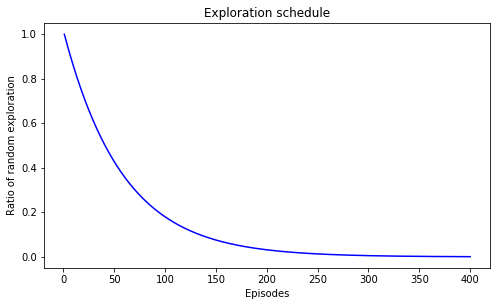

In [3]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [4]:
Balance_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, verbose = True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 48)           432         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 48)           2352        dense[0][0]                      
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 48)           2352        dense_1[0][0]                    
______________________________________________________________________________________________

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_48 (Dense)                (None, 48)           336         input_9[0][0]                    
__________________________________________________________________________________________________
dense_49 (Dense)                (None, 48)           2352        dense_48[0][0]                   
__________________________________________________________________________________________________
dense_52 (Dense)                (None, 48)           2352        dense_49[0][0]                   
____________________________________________________________________________________________

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_96 (Dense)                (None, 48)           192         input_17[0][0]                   
__________________________________________________________________________________________________
dense_97 (Dense)                (None, 48)           2352        dense_96[0][0]                   
__________________________________________________________________________________________________
dense_100 (Dense)               (None, 48)           2352        dense_97[0][0]                   
___________________________________________________________________________________________

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 7)]          0                                            
__________________________________________________________________________________________________
dense_144 (Dense)               (None, 48)           384         input_25[0][0]                   
__________________________________________________________________________________________________
dense_145 (Dense)               (None, 48)           2352        dense_144[0][0]                  
__________________________________________________________________________________________________
dense_148 (Dense)               (None, 48)           2352        dense_145[0][0]                  
___________________________________________________________________________________________

In [ ]:
Balance_MultiDQN_Agents.prepopulate_memory()

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance.inpx ...
Model File load process successful.
Simulation length set to 10000 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
Deploying Network Parser...


In [6]:
Balance_MultiDQN_Agents.train(episodes)

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance.inpx ...
Model File load process successful.
Simulation length set to 1800 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links and Lanes.

Setting Simulation mode to: training
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed ti

Weights succesfully copied to Target model for Agent 5.
Average Reward for Agent 6 this episode : -22.19
Train on 64 samples
64/64 - 0s - loss: 1069.7218
Weights succesfully copied to Target model for Agent 6.
Average Reward for Agent 7 this episode : -8.62
Train on 64 samples
64/64 - 0s - loss: 39.5090
Weights succesfully copied to Target model for Agent 7.
Average Reward for Agent 8 this episode : -32.35
Train on 64 samples
64/64 - 0s - loss: 1241.6010
Weights succesfully copied to Target model for Agent 8.
Average Reward for Agent 9 this episode : -15.8
Train on 64 samples
64/64 - 0s - loss: 692.7536
Weights succesfully copied to Target model for Agent 9.
Average Reward for Agent 10 this episode : -4.81
Train on 64 samples
64/64 - 0s - loss: 107.9719
Weights succesfully copied to Target model for Agent 10.
Average Reward for Agent 11 this episode : -39.1
Train on 64 samples
64/64 - 0s - loss: 1921.6545
Weights succesfully copied to Target model for Agent 11.
Average Reward for Agent

In [7]:
Balance_MultiDQN_Agents.save()

Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Saving architecture, weights and optimizer state for agent-1
Dumping agent-1 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Saving architecture, weights and optimizer state for agent-2
Dumping agent-2 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Saving architecture, weights and optimizer state for agent-3
Dumping agent-3 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Saving architecture, weights and optimizer state for agent-4
Dumping agent-4 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Saving architecture, weights and optimizer state for agent-5
Dumping agent-5 memory i

In [9]:
Balance_MultiDQN_Agents.load(best = False)

[autoreload of tensorflow.python.keras.layers.core failed: Traceback (most recent call last):
  File "C:\Users\Rzhang\Anaconda3\envs\tf2\lib\site-packages\IPython\extensions\autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Rzhang\Anaconda3\envs\tf2\lib\site-packages\IPython\extensions\autoreload.py", line 378, in superreload
    module = reload(module)
  File "C:\Users\Rzhang\Anaconda3\envs\tf2\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\Rzhang\Anaconda3\envs\tf2\lib\importlib\__init__.py", line 148, in reload
    raise ImportError(msg.format(name), name=name)
ImportError: module DQNAgents not in sys.modules
]


Loading Pre-Trained Agent 0, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 1, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 2, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 3, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 4, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 5, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 6, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 7, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 8, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 9, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 10, Architecture, Optimizer and Memory.
Items successf

# Single_Cross_Straight

---> The lack of speed comes from the size of the model (particularly the change of color of the heads). 

In [2]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'compatible_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 1,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' }
        },
 'demand' : { 'default' : [400, 400, 400, 400]}
}

In [3]:
print('tot')

tot


In [4]:
env = environment(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

env.SCUs


Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Straight.inpx ...
Load process successful
Simulation length set to 3601 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Simulation Object
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                 SETUP COMPLETE                      *
*                                                     *
*******************************************************

0.08910298347473145


{0: <Vissim_SCU_class.Signal_Control_Unit at 0x190b93b9160>}

In [5]:
gamma = 0.85
alpha = 0.00005
ID = 0
value = 25
entropy = 0.05
n_step_size = 16
state_size = [5]


# for the monitoring
horizon = 100
n_sample = 10

Agents = []

for idx, info in Single_Cross_Straight_dictionary['junctions'].items():
        acts = info['compatible_actions']
        Agent = ACAgent(state_size, len(acts), ID, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)


Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  384       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  252       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
__________________________________________________

In [6]:
env.reset()
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

for _ in range(100000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn()
                
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
    
    # For the saving , monitoring of the agent
    if env.done :
        env.reset()
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)
            
            
            
        
            

Agent 0 : Predicted Values and True Return : 
 [-60.0, -72.0, -72.0, -72.0, -72.0, -69.0, -72.0, -72.0, -30.0, -40.0] 
 [-439.0, -527.0, -527.0, -527.0, -527.0, -507.0, -527.0, -526.0, -255.0, -324.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.02, 0.98], [0.0, 1.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0.5 0.5]
Agent 0 : Predicted Values and True Return : 
 [-3.0, -5.0, -5.0, -3.0, -5.0, -4.0, -3.0, -13.0, -10.0, -9.0] 
 [-217.0, -527.0, -417.0, -527.0, -72.0, -527.0, -527.0, -243.0, -451.0, -527.0]
Agent 0 : Proba distribution on those states : 
 [[0.37, 0.63], [0.71, 0.29], [0.67, 0.33], [0.36, 0.64], [0.71, 0.29], [0.27, 0.73], [0.37, 0.63], [0.78, 0.22], [0.07, 0.93], [0.15, 0.85]]
Agent 0 : Proba distribution on the 0 state : 
 [0.49 0.51]
Agent 0 : Predicted Values and True Return : 
 [-6.0, -6.0, -11.0, -6.0, -9.0, -14.0, -6.0, -6.0, -13.0, -10.0] 
 [-527.0, -527

KeyboardInterrupt: 

In [9]:
Agents[0].save_agent(vissim_working_directory, model_name, 'TEST')

Saving architecture, weights, optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.


In [12]:
Agents[0].load_agent(vissim_working_directory, model_name, 'TEST', best = False)

Loading Pre-Trained Agent, Architecture and Memory.
Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  384       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  252       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_________________________________________________________________
policy_l

# Single_Cross_Triple 4 actions

In [2]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 2000

# all controller actions
Single_Cross_Triple_dictionary4 =\
{ 'junctions' : {
    # Controller Number 0 
    0 : {'compatible_actions' : {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'green_time' : 10,
         'redamber_time' : 1,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         }
            }
}

In [3]:
env = environment(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

env.SCUs

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Triple.inpx ...
Load process successful
Simulation length set to 2000 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Simulation Object
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                 SETUP COMPLETE                      *
*                                                     *
*******************************************************

0.12496423721313477


{0: <Vissim_SCU_class.Signal_Control_Unit at 0x1f26b747860>}

In [4]:
# not bad with the first model. need a fonction to decrease entropy now 

gamma = 0.85
alpha = 0.0005
ID = 0
value = 25
entropy = 5000
n_step_size = 11
state_size = [12]
reduce_entropy_every = 100
entropy_threshold = 0.5


# for the monitoring
horizon = 50
n_sample = 10

Agents = []

for idx, info in Single_Cross_Triple_dictionary4['junctions'].items():
        acts = info['compatible_actions']
        Agent = ACAgent(info['state_size'], len(acts), ID, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  896       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  588       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
__________________________________________________

In [5]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = int(Agents[idx].choose_action(s))


for i in range(30000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required :
        
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
            if (i+1)%reduce_entropy_every == 0:
                if Agents[idx].params['entropy'] >= entropy_threshold :
                    Agents[idx].reduce_entropy()
                    print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
        
    # For the saving , monitoring of the agent
    if env.done :
        env.reset()
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  896       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  588       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_________________________________________________________________
policy_logits3 (Dense)       multiple                  1806 

tomate
Agent 0 : Predicted Values and True Return : 
 [-1732.0, -2332.0, -2332.0, -2277.0, -2305.0, -371.0, -2332.0, -2332.0, -1959.0, -2332.0] 
 [-104.0, -221.0, -202.0, -128.0, -138.0, -207.0, -155.0, -166.0, -116.0, -150.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0. 0. 0. 1.]
tomate
Agent 0 : Predicted Values and True Return : 
 [-1370.0, -2332.0, -2029.0, -1640.0, -1370.0, -1888.0, -2277.0, -1821.0, -2332.0, -723.0] 
 [-152.0, -160.0, -118.0, -95.0, -152.0, -97.0, -134.0, -88.0, -147.0, -286.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.

tomate
Agent 0 : Predicted Values and True Return : 
 [-1613.0, -815.0, -2357.0, -1655.0, -1713.0, -865.0, -225.0, -1613.0, -1164.0, -2288.0] 
 [-123.0, -294.0, -156.0, -95.0, -94.0, -290.0, -114.0, -123.0, -226.0, -147.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0. 0. 0. 1.]
tomate
Agent 0 : Predicted Values and True Return : 
 [-1052.0, -2262.0, -1475.0, -2211.0, -1633.0, -1545.0, -1431.0, -680.0, -1961.0, -1402.0] 
 [-302.0, -152.0, -147.0, -139.0, -101.0, -148.0, -151.0, -278.0, -100.0, -155.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0

tomate
Agent 0 : Predicted Values and True Return : 
 [-1167.0, -2096.0, -1755.0, -1706.0, -2372.0, -2372.0, -2140.0, -2372.0, -1715.0, -2096.0] 
 [-226.0, -120.0, -103.0, -91.0, -143.0, -166.0, -127.0, -139.0, -94.0, -120.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0. 0. 0. 1.]
tomate
Agent 0 : Predicted Values and True Return : 
 [-1842.0, -2372.0, -2148.0, -2372.0, -1621.0, -2213.0, -1525.0, -2372.0, -1621.0, -2263.0] 
 [-95.0, -150.0, -131.0, -147.0, -109.0, -139.0, -150.0, -161.0, -109.0, -152.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 

tomate
Agent 0 : Predicted Values and True Return : 
 [-721.0, -1396.0, -2372.0, -367.0, -2372.0, -1612.0, -1707.0, -617.0, -997.0, -1467.0] 
 [-286.0, -155.0, -221.0, -159.0, -150.0, -123.0, -91.0, -255.0, -306.0, -147.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0. 0. 0. 1.]
tomate
Agent 0 : Predicted Values and True Return : 
 [-2018.0, -1246.0, -1568.0, -2371.0, -1517.0, -2184.0, -859.0, -1689.0, -2371.0, -859.0] 
 [-101.0, -211.0, -141.0, -158.0, -145.0, -130.0, -290.0, -90.0, -146.0, -290.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 

tomate
Agent 0 : Predicted Values and True Return : 
 [-572.0, -1214.0, -2372.0, -2356.0, -2372.0, -2356.0, -615.0, -2372.0, -2036.0, -2264.0] 
 [-241.0, -212.0, -139.0, -156.0, -142.0, -156.0, -255.0, -215.0, -109.0, -152.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0. 0. 0. 1.]
tomate
Agent 0 : Predicted Values and True Return : 
 [-2357.0, -447.0, -2181.0, -486.0, -2264.0, -1835.0, -447.0, -2264.0, -2372.0, -1488.0] 
 [-149.0, -189.0, -129.0, -207.0, -152.0, -95.0, -189.0, -152.0, -142.0, -146.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0

tomate
Agent 0 : Predicted Values and True Return : 
 [-1901.0, -2281.0, -1147.0, -886.0, -2190.0, -1979.0, -2322.0, -359.0, -1491.0, -2322.0] 
 [-99.0, -128.0, -226.0, -290.0, -146.0, -101.0, -143.0, -159.0, -150.0, -215.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0. 0. 0. 1.]
tomate
Agent 0 : Predicted Values and True Return : 
 [-1223.0, -2321.0, -1771.0, -1995.0, -2321.0, -2321.0, -1128.0, -2123.0, -1949.0, -2321.0] 
 [-211.0, -189.0, -99.0, -109.0, -147.0, -154.0, -248.0, -131.0, -99.0, -143.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.

com_error: (-2147352562, 'Nombre de paramètres non valide.', None, None)

In [ ]:
Agents[0].model.loss

# Single_Cross_Triple 8 actions

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
    0 : {'compatible_actions' : {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                     4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                     5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                     6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                     7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [12],
         'state_type' : 'Queues',
         'reward_type' : 'Queues' 
         }
}

In [ ]:
env = env(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

env.SCUs

In [ ]:
gamma = 0.85
alpha = 0.00005
ID = 0
value = 25
entropy = 2000
n_step_size = 16
state_size = [12]
reduce_entropy_every = 100



# for the monitoring
horizon = 100
n_sample = 10

Agents = []

for idx, info in Single_Cross_Triple_dictionary8.items():
        acts = info['compatible_actions']
        Agent = ACAgent(state_size, len(acts), ID, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

In [ ]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

for i in range(100000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
            if (i+1)%reduce_entropy_every == 0:
                Agents[idx].reduce_entropy()
                print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
            
    
    # For the saving , monitoring of the agent
    if env.done :
        env.reset()
        for idx, agent in enumerate(Agents):
                    predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
                    print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
                    print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
                    print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
                    agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)